### 비트 코인 가격 예측
https://www.blockchain.com/explorer/charts/market-price

- auto_arima를 사용하여 적합한 모델을 찾고, 이를 통해 금융 데이터 포트폴리오를 제작한다.

In [1]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [2]:
from datetime import datetime

def changeDate(milis):
    timestamp = milis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [3]:
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [4]:
bitcoin_df = bitcoin_df.rename(columns={'x': 'Date', 'y': 'Price'})

In [5]:
bitcoin_df.set_index('Date', inplace=True)
bitcoin_df

,Price
Date,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [6]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


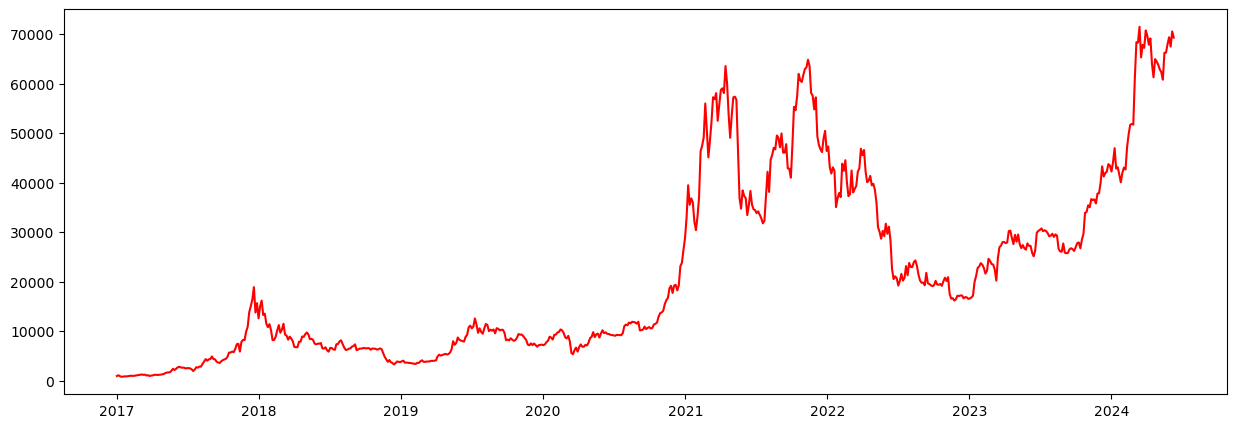

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(bitcoin_df['2017-01-01':], c='red')
plt.show()

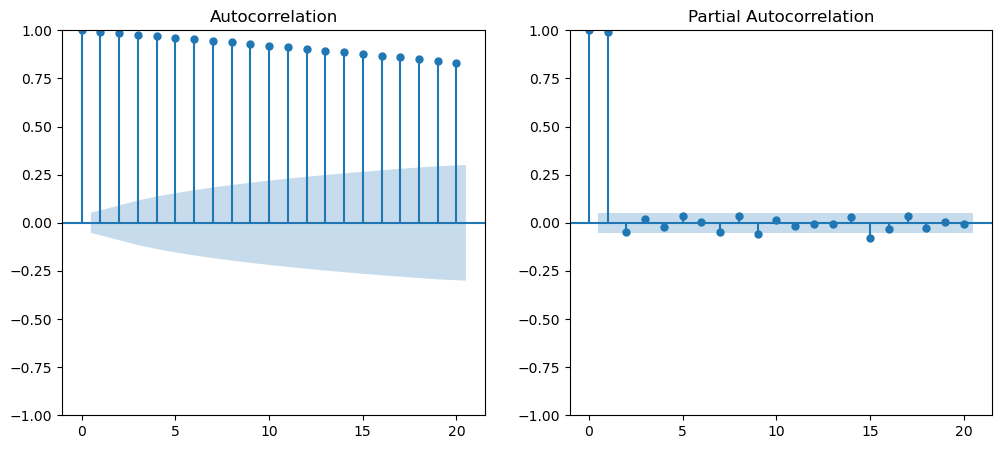

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig = plot_acf(bitcoin_df, lags=20, ax=ax[0])
fig = plot_pacf(bitcoin_df, lags=20, ax=ax[1])

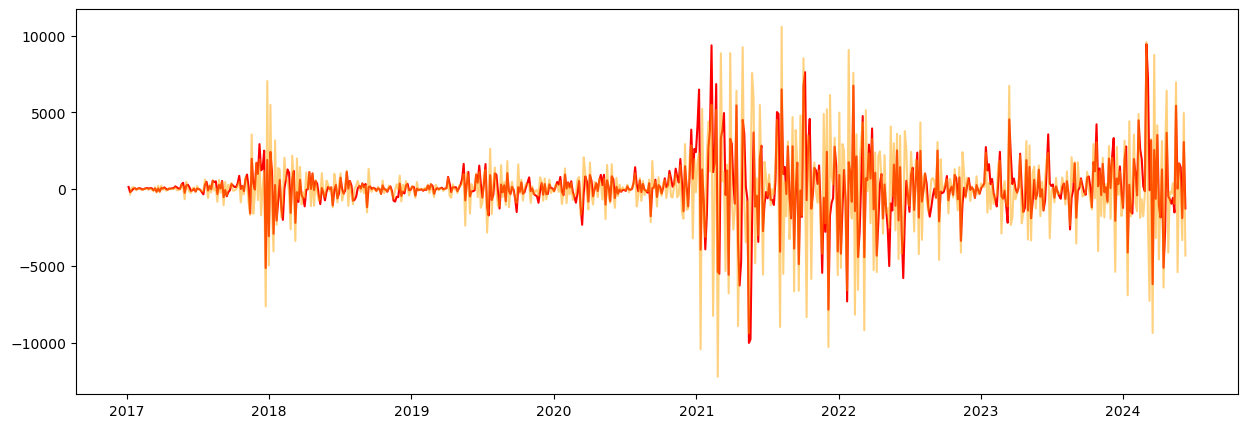

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(bitcoin_df['2017-01-01':].diff().dropna(), c='red')
plt.plot(bitcoin_df['2017-01-01':].diff().diff().dropna(), c='orange', alpha=0.5)
plt.show()

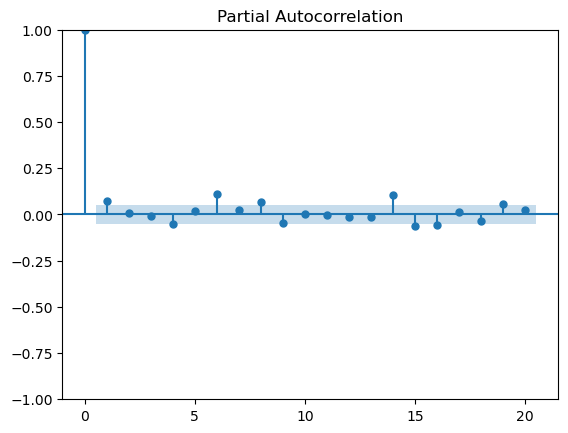

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(bitcoin_df.diff().dropna(), lags=20)
plt.show()

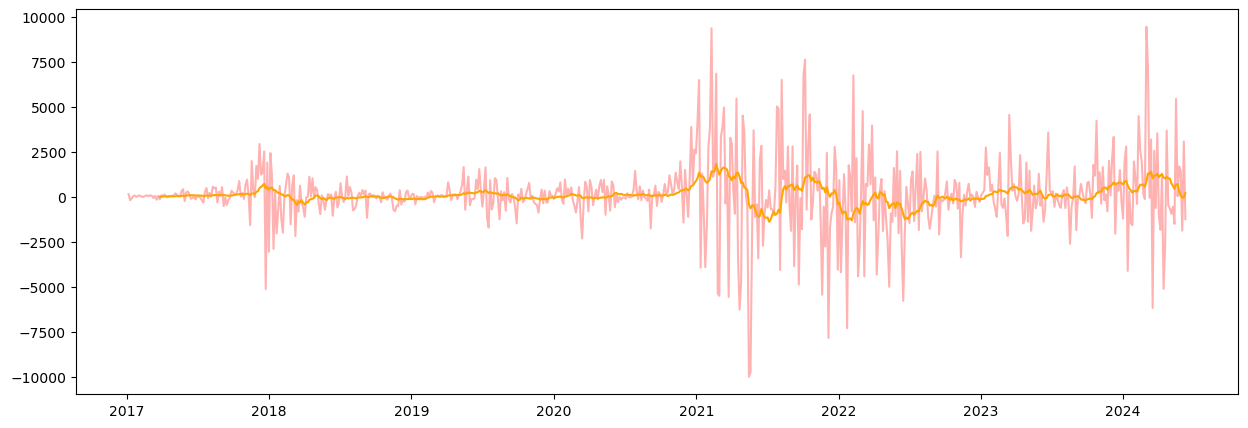

In [11]:
import matplotlib.pyplot as plt

window_size = 21

plt.figure(figsize=(15, 5))

plt.plot(bitcoin_df['2017-01-01':].diff().dropna(), c='red', alpha=0.3)
plt.plot(bitcoin_df['2017-01-01':].diff().dropna().rolling(window_size).mean(), c='orange')
plt.show()

In [12]:
bitcoin_df = bitcoin_df['2017-01-01':]
bitcoin_df

,Price
Date,
2017-01-01,964.84
2017-01-05,1109.16
2017-01-09,910.49
2017-01-13,805.52
2017-01-17,830.56
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [13]:
import numpy as np

rate_bitcoin_df = np.log(bitcoin_df / bitcoin_df.shift(1))
rate_bitcoin_df

,Price
Date,
2017-01-01,NaN
2017-01-05,0.139396
2017-01-09,-0.197375
2017-01-13,-0.122495
2017-01-17,0.030612
...,...
2024-05-24,0.024980
2024-05-28,0.020857
2024-06-01,-0.027610


<Axes: xlabel='Date'>

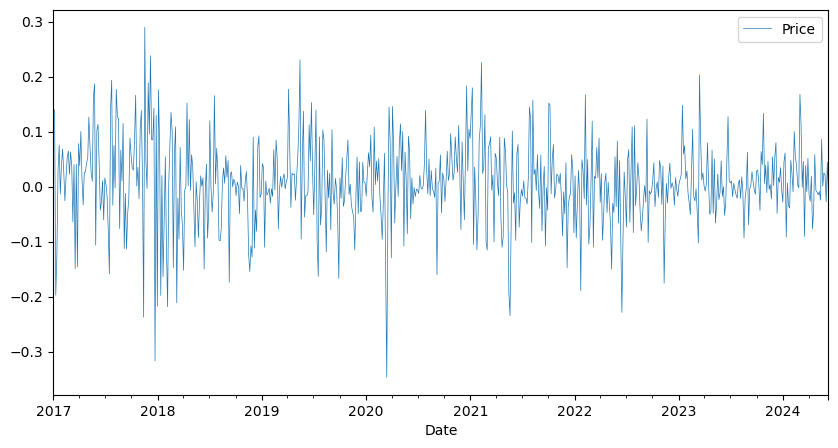

In [14]:
rate_bitcoin_df.plot(figsize=(10, 5), lw=0.5)

In [15]:
# 연율화
# 연간 영업일(약 252일로 계산)
rate_bitcoin_df.mean() * 252

Price    1.586304
dtype: float64

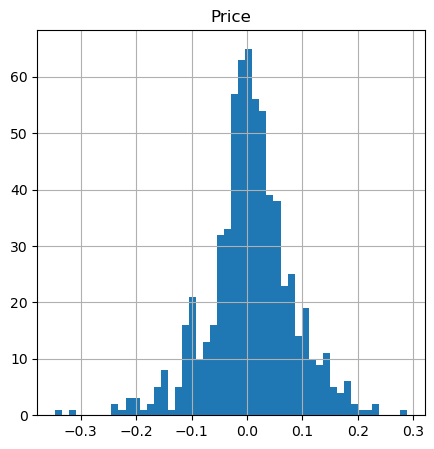

In [16]:
rate_bitcoin_df.hist(figsize=(5, 5), bins=50)
plt.show()

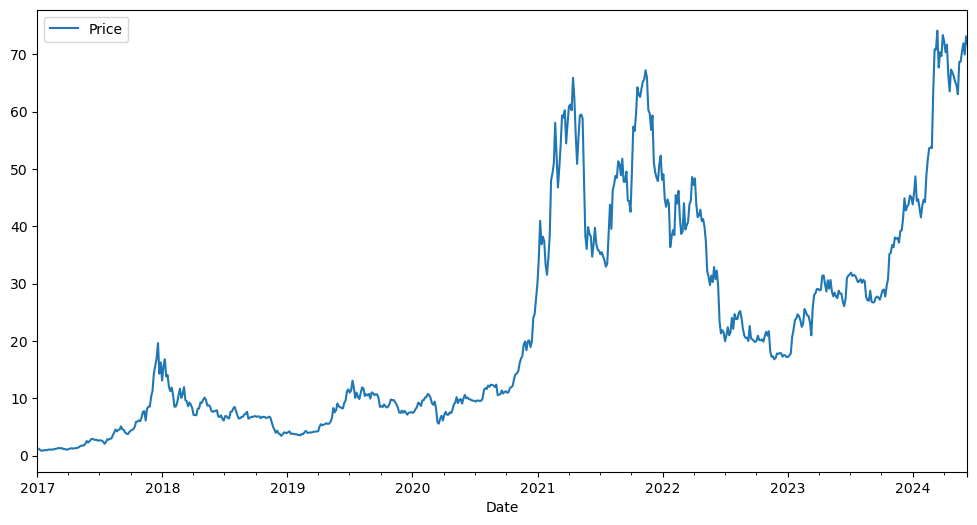

In [17]:
# 각 원소들의 누적합
# 일간 수익률
rate_bitcoin_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

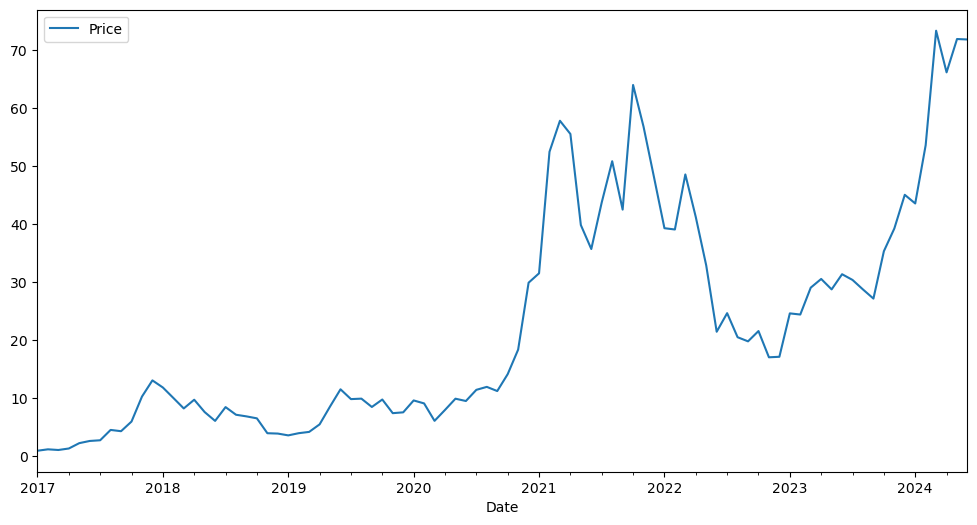

In [18]:
# 월간 수익률
rate_bitcoin_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [19]:
bitcoin_df = bitcoin_df.dropna()
bitcoin_df

,Price
Date,
2017-01-01,964.84
2017-01-05,1109.16
2017-01-09,910.49
2017-01-13,805.52
2017-01-17,830.56
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [20]:
window = 20

bitcoin_df['min'] = bitcoin_df['Price'].rolling(window=window).min()
bitcoin_df['mean'] = bitcoin_df['Price'].rolling(window=window).mean()
bitcoin_df['std'] = bitcoin_df['Price'].rolling(window=window).std()
bitcoin_df['median'] = bitcoin_df['Price'].rolling(window=window).median()
bitcoin_df['max'] = bitcoin_df['Price'].rolling(window=window).max()

bitcoin_df.dropna()

,Price,min,mean,std,median,max
Date,,,,,,
2017-03-18,1068.30,805.52,1031.3255,138.516565,1006.140,1271.04
2017-03-22,1113.00,805.52,1038.7335,138.735410,1032.815,1271.04
2017-03-26,961.81,805.52,1031.3660,138.711078,1006.140,1271.04
2017-03-30,1039.77,805.52,1037.8300,135.762652,1025.425,1271.04
2017-04-03,1079.99,830.56,1051.5535,124.444300,1047.160,1271.04
...,...,...,...,...,...,...
2024-05-24,67942.23,60805.78,66133.4685,3065.494173,66252.600,71489.22
2024-05-28,69374.17,60805.78,66186.8320,3114.222252,66252.600,71489.22
2024-06-01,67484.93,60805.78,65986.6175,2874.911875,66252.600,70754.69


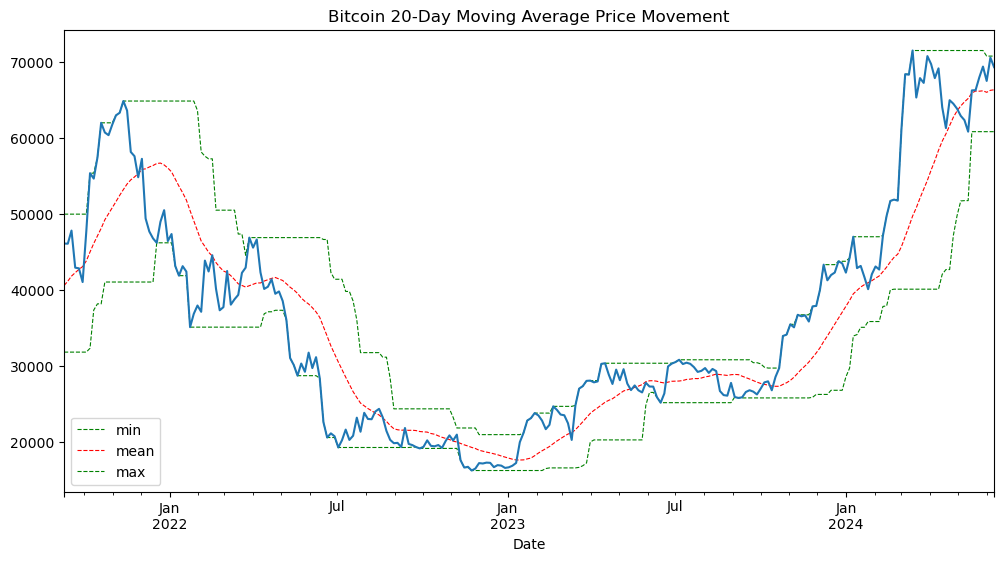

In [21]:
import matplotlib.pyplot as plt

ax = bitcoin_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
bitcoin_df['Price'].iloc[-252:].plot(ax=ax)
plt.title('Bitcoin 20-Day Moving Average Price Movement')
plt.show()

In [22]:
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

bitcoin_df['SMA1'] = bitcoin_df['Price'].rolling(window=21).mean() # short-term
bitcoin_df['SMA2'] = bitcoin_df['Price'].rolling(window=252).mean() # long-term
bitcoin_df[['Price', 'SMA1', 'SMA2']].tail()

,Price,SMA1,SMA2
Date,,,
2024-05-24,67942.23,66240.335238,35938.461587
2024-05-28,69374.17,66287.787619,36017.234087
2024-06-01,67484.93,66248.646190,36090.361349
2024-06-05,70553.24,66204.075714,36183.208056
2024-06-09,69297.93,66394.278571,36259.995952


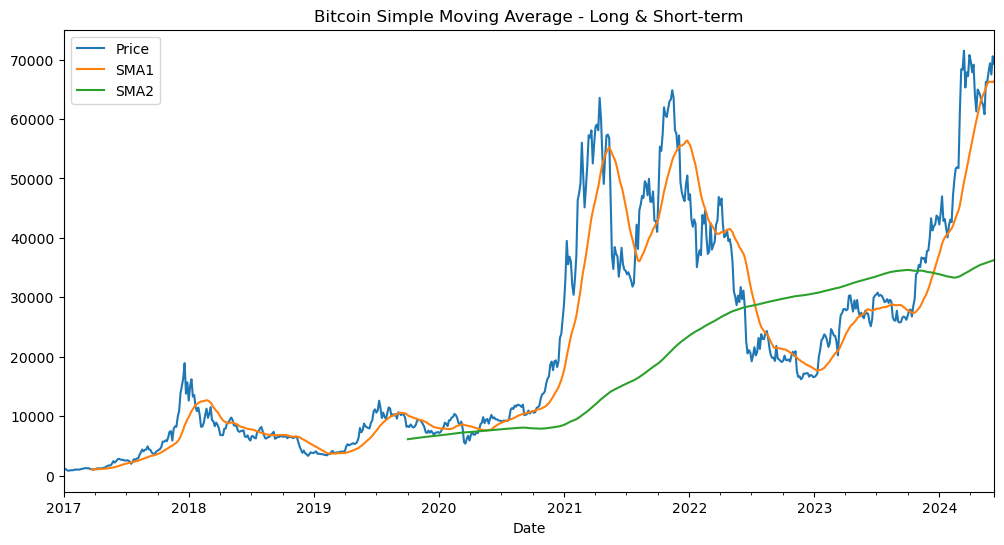

In [23]:
bitcoin_df[['Price', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title('Bitcoin Simple Moving Average - Long & Short-term')
plt.show()

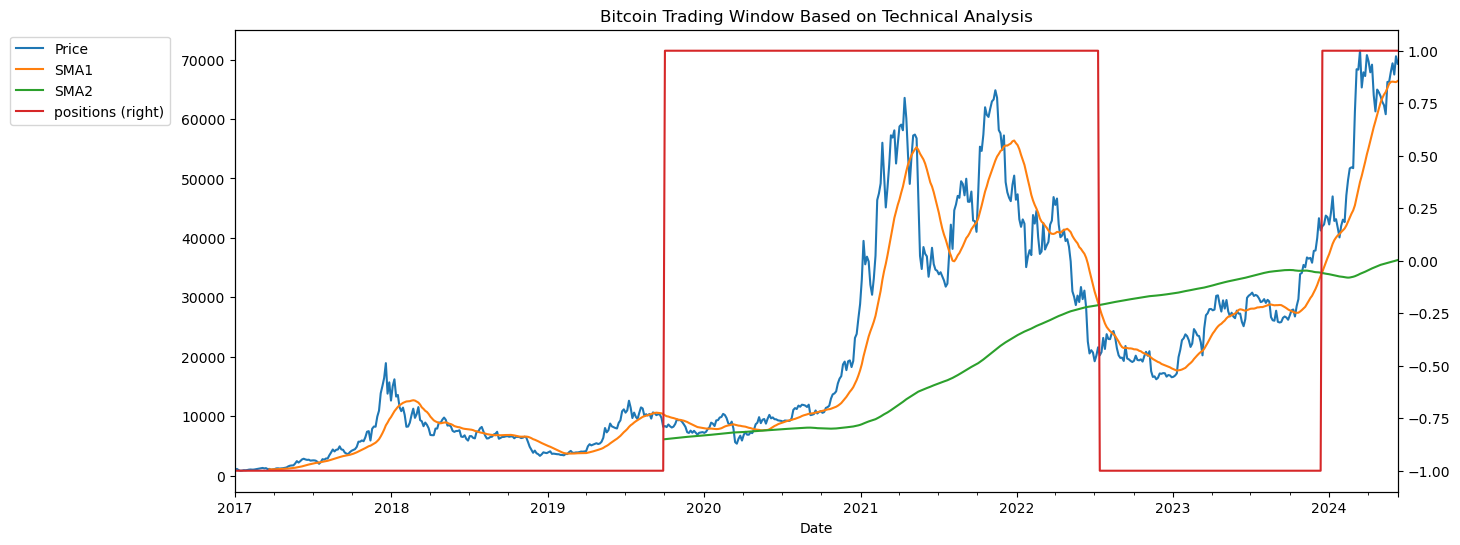

In [24]:
bitcoin_df['positions'] = np.where(bitcoin_df['SMA1'] > bitcoin_df['SMA2'], 1, -1)

ax = bitcoin_df[['Price', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title('Bitcoin Trading Window Based on Technical Analysis')
plt.show()

In [26]:
# 모델 훈련 및 예측

pre_bitcoin_df = bitcoin_df[['Price']]
pre_bitcoin_df

,Price
Date,
2017-01-01,964.84
2017-01-05,1109.16
2017-01-09,910.49
2017-01-13,805.52
2017-01-17,830.56
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [27]:
y_train = pre_bitcoin_df['Price'][:int(0.8 * len(pre_bitcoin_df))]
y_test = pre_bitcoin_df['Price'][int(0.8 * len(pre_bitcoin_df)):]

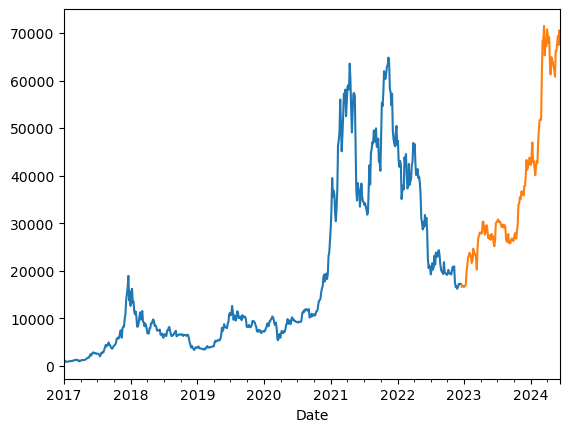

In [28]:
y_train.plot()
y_test.plot()

plt.show()

In [29]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

print(f'd = {n_diffs}')

d = 1


In [39]:
import pmdarima as pm

model = pm.auto_arima(y=y_train, d=1, start_p=0, max_p=10, start_q=0, max_q=10, m=1, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9728.517, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9726.582, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9726.546, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9726.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9728.545, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9728.592, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9730.550, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9724.663, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9726.662, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9726.709, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9724.698, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9728.605, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.460 seconds


In [40]:
model.fit(y_train)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [41]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  544
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4860.331
Date:                Wed, 12 Jun 2024   AIC                           9724.663
Time:                        11:20:36   BIC                           9733.257
Sample:                    01-01-2017   HQIC                          9728.023
                         - 12-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0862      0.022      3.865      0.000       0.042       0.130
sigma2       3.51e+06   1.07e+05     32.672      0.000     3.3e+06    3.72e+06
Ljung-Box (L1) (Q):                   0.00   Jarque-

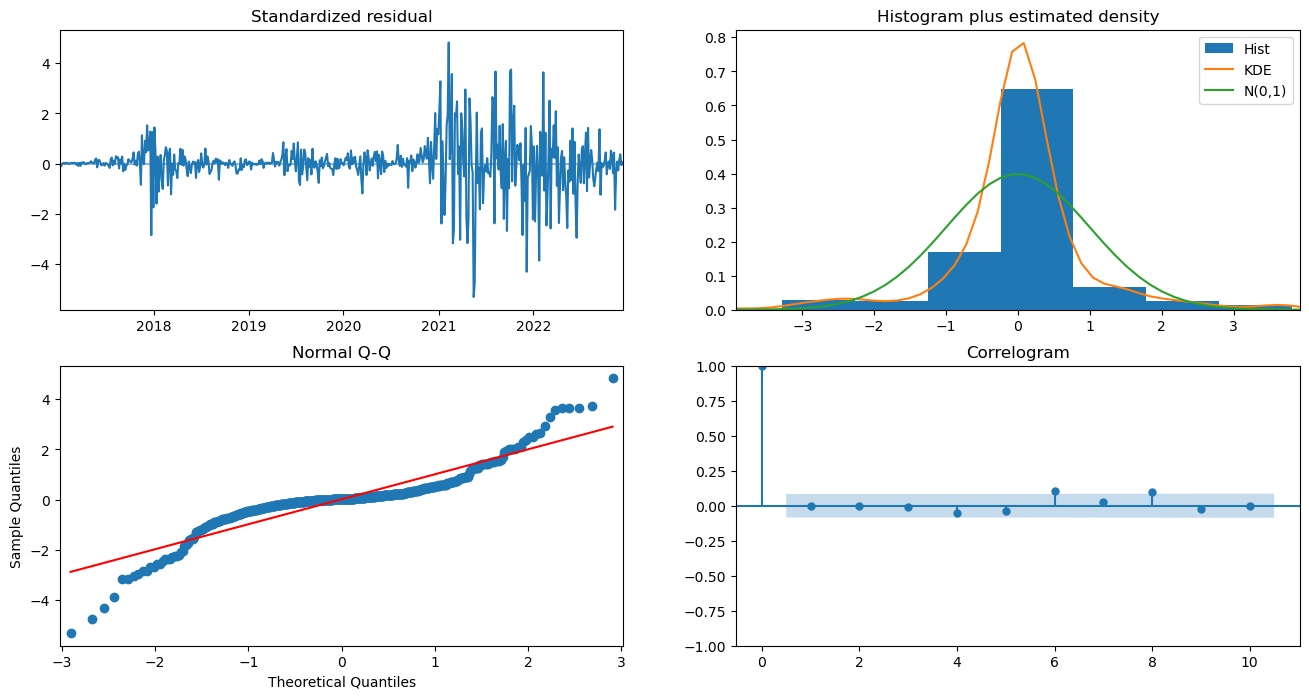

In [42]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [43]:
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [44]:
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

In [45]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
Date,,
2022-12-17,16637.60,17203.541131
2022-12-21,16904.64,16588.820530
2022-12-25,16838.10,16931.825475
2022-12-29,16539.28,16830.033169
2023-01-02,16613.71,16514.245985
...,...,...
2024-05-24,67942.23,66234.722993
2024-05-28,69374.17,68073.747880
2024-06-01,67484.93,69475.407048


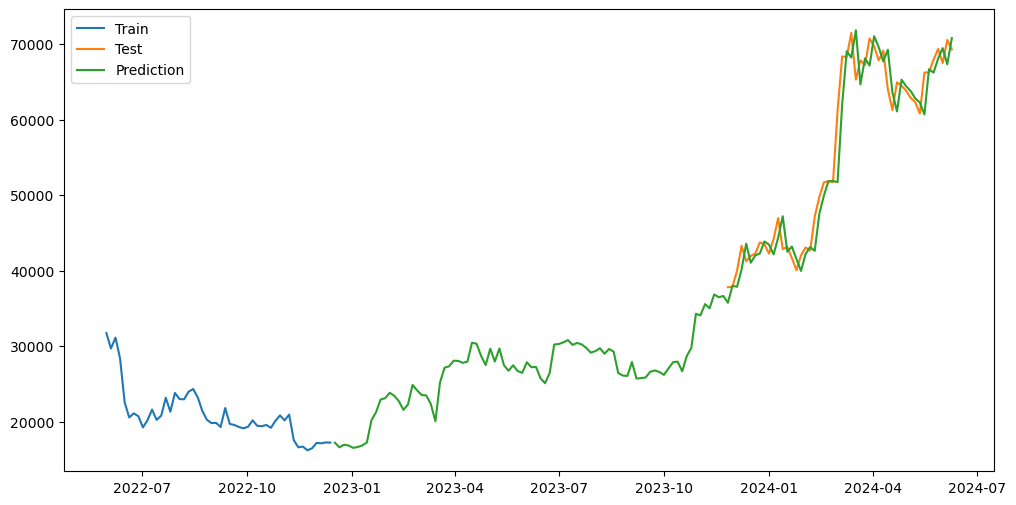

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(y_train.iloc[-50:], label='Train')
plt.plot(y_test.iloc[-50:], label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [47]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 3.5465
